In [1]:
# reload imports when running a function(this will make it so you don't have to reload the entire notebook if you change a function that you are importing and want the change to register)
%reload_ext autoreload
%autoreload 2

In [11]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from dataset import convert_bbox_format, draw_cxcywhd

### Change Image Id and Result Folder

In [9]:
image_id = "Lunch1_000341"
image_directory = "CEPDOF\\CEPDOF\Lunch1\\"
annotation_directory = "CEPDOF\\CEPDOF\\annotations\\Lunch1.json"
results_1_directory = "runs\\retina-rotated-boxes-SmoothL1Loss-FixedLoss\\results_7500_val.json"
results_2_directory = "runs\\retina-rotated-boxes-SmoothL1Loss-FixedLoss\\results_10000_val.json"
im = plt.imread(image_directory + image_id + ".jpg")

### Load Ground Truth Annotations

In [10]:
with open(annotation_directory) as f:
    groundtruth = json.load(f)
groundtruth = groundtruth['annotations']
groundtruth_annotations = [annotation for annotation in groundtruth if annotation['image_id'] == image_id]
print(groundtruth_annotations)

[{'area': 151792.377423, 'bbox': [688.4808, 1452.8709, 295.518, 513.6485, 28.357133523355117], 'category_id': 1, 'image_id': 'Lunch1_000341', 'iscrowd': 0, 'segmentation': [], 'person_id': 8}, {'area': 26100.86492085, 'bbox': [1212.7565, 232.2542, 153.9597, 169.5305, 9.785891081590876], 'category_id': 1, 'image_id': 'Lunch1_000341', 'iscrowd': 0, 'segmentation': [], 'person_id': 4}, {'area': 37984.358770269995, 'bbox': [1309.8209, 318.1593, 169.0313, 224.7179, -83.12450645843012], 'category_id': 1, 'image_id': 'Lunch1_000341', 'iscrowd': 0, 'segmentation': [], 'person_id': 5}, {'area': 37984.358770269995, 'bbox': [1307.8209, 316.1593, 169.0313, 224.7179, -83.12450645843012], 'category_id': 1, 'image_id': 'Lunch1_000341', 'iscrowd': 0, 'segmentation': [], 'person_id': 5}]


### Load Results Annotations

In [14]:
with open(results_1_directory) as p:
    results_1 = json.load(p)
result_1_annotations = [annotation for annotation in results_1 if annotation['image_id'] == image_id]

In [15]:
with open(results_2_directory) as p:
    results_2 = json.load(p)
result_2_annotations = [annotation for annotation in results_2 if annotation['image_id'] == image_id]

### Display The Corresponding Bounding Boxes

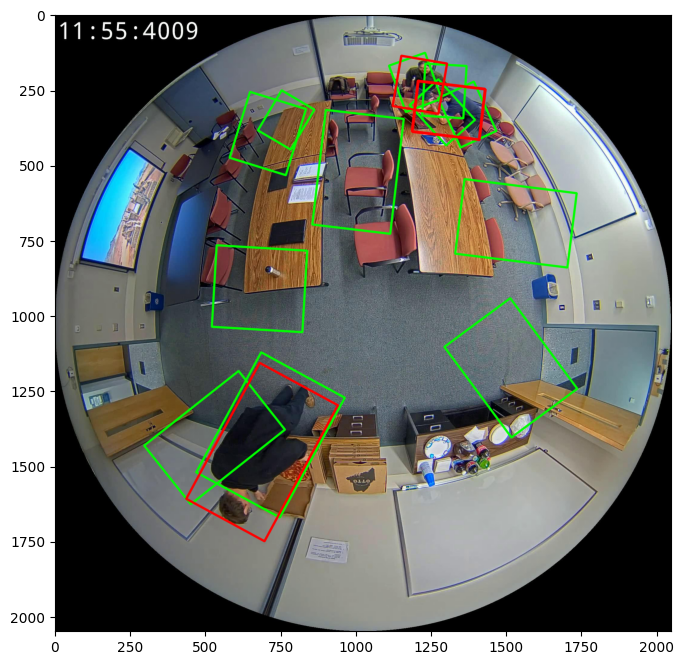

In [16]:
for ann in result_1_annotations:
    ##Green
    cx, cy, w, h, degree = convert_bbox_format(ann['bbox'])
    draw_cxcywhd(im, cx, cy, w, h, degree, color=(0,255,0))
"""for ann in result_2_annotations:
    ##Blue
    cx, cy, w, h, degree = convert_bbox_format(ann['bbox'])
    draw_cxcywhd(im, cx, cy, w, h, degree, color=(0,0,255))"""
for ann in groundtruth_annotations:
    ##Red
    cx, cy, w, h, degree = ann['bbox']
    draw_cxcywhd(im, cx, cy, w, h, degree, color=(255,0,0))
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.savefig(image_id+".png")
plt.show()